In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path='/content/drive/MyDrive/walmart Retail Data.xlsx'
data=pd.read_excel(path)
data.describe()

,Customer Age,Discount,Number of Records,Order Date,Order ID,Order Quantity,Product Base Margin,Profit,Row ID,Sales,Ship Date,Shipping Cost,Unit Price,Zip Code
count,7496.000000,8399.000000,8399.0,8399,8399.000000,8399.000000,8336.000000,8399.000000,8399.000000,8399.000000,8399,8399.000000,8399.000000,8399.000000
mean,54.542823,0.049671,1.0,2013-12-24 18:31:30.225026560,29965.179783,25.571735,0.512513,181.184422,4200.000000,1775.878179,2013-12-26 19:17:37.411596544,12.838557,89.346259,52839.139421
min,41.000000,0.000000,1.0,2012-01-01 00:00:00,3.000000,1.000000,0.350000,-14140.701600,1.000000,2.240000,2012-01-02 00:00:00,0.490000,0.990000,1001.000000
25%,47.000000,0.020000,1.0,2012-12-20 00:00:00,15011.500000,13.000000,0.380000,-83.315000,2100.500000,143.195000,2012-12-22 12:00:00,3.300000,6.480000,30337.000000
50%,53.000000,0.050000,1.0,2013-12-17 00:00:00,29857.000000,26.000000,0.520000,-1.500000,4200.000000,449.420000,2013-12-18 00:00:00,6.070000,20.990000,52732.000000
75%,61.000000,0.080000,1.0,2015-01-01 12:00:00,44596.000000,38.000000,0.590000,162.748000,6299.500000,1709.320000,2015-01-03 12:00:00,13.990000,85.990000,77577.000000
max,95.000000,0.250000,1.0,2015-12-30 00:00:00,59973.000000,50.000000,0.850000,27220.690000,8399.000000,89061.050000,2015-12-30 00:00:00,164.730000,6783.020000,99362.000000
std,9.519435,0.031823,0.0,NaN,17260.883447,14.481071,0.135589,1196.653326,2424.726789,3585.050525,NaN,17.264052,290.354383,28509.535635


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data.isnull().sum()  # Shows the number of missing values in each column

,0
City,0
Customer Age,903
Customer Name,0
Customer Segment,0
Discount,0
Number of Records,0
Order Date,0
Order ID,0
Order Priority,0
Order Quantity,0


In [ ]:
data['Customer Age'].fillna(data['Customer Age'].mean(), inplace=True)

<ipython-input-5-3ac4c448f110>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Customer Age'].fillna(data['Customer Age'].mean(), inplace=True)


SARIMA


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
sales_data=data[['Order Date','Sales']]
sales_data=pd.DataFrame(sales_data)
sales_data['Order Date']=pd.to_datetime(sales_data['Order Date'])
print(sales_data.head())

print(data.head())

  Order Date    Sales
0 2012-01-01   180.36
1 2012-01-01   872.48
2 2012-01-02  1239.06
3 2012-01-02   614.80
4 2012-01-02  4083.19
         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport     54.542823     Jessica Myrick   Small Business      0.10   
1       Bowie     54.542823     Matt Collister      Home Office      0.08   
2        Napa     54.542823  Alan Schoenberger        Corporate      0.00   
3  Montebello     54.542823  Elizabeth Moffitt         Consumer      0.08   
4        Napa     54.542823  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   


In [ ]:
data1 = sales_data.set_index('Order Date')

monthly_sales = data1.resample('M').mean()
monthly_sales.head()


<ipython-input-8-28e9e40f4ba4>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data1.resample('M').mean()


,Sales
Order Date,
2012-01-31,2315.259908
2012-02-29,2187.372609
2012-03-31,2225.020157
2012-04-30,2286.491174
2012-05-31,1264.535923


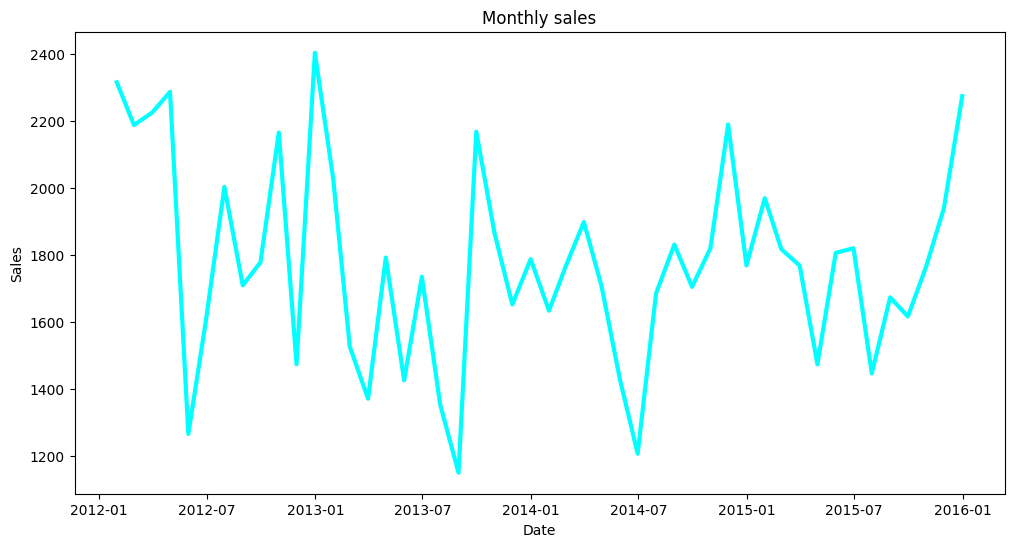

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Sales'], linewidth=3,c='cyan')
plt.title("Monthly sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [ ]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Sales'])

ADF Statistic: -5.606134546731689
p-value: 1.2330385337321382e-06
Stationary


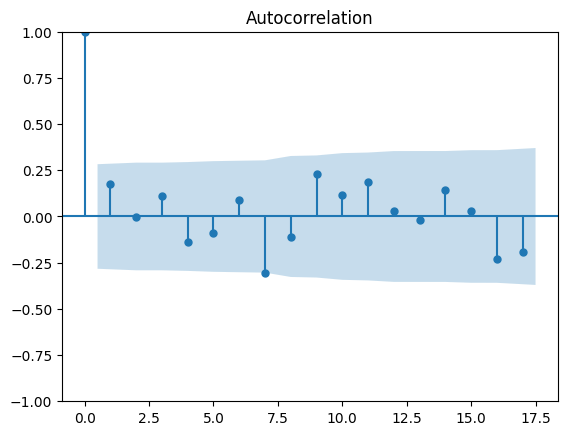

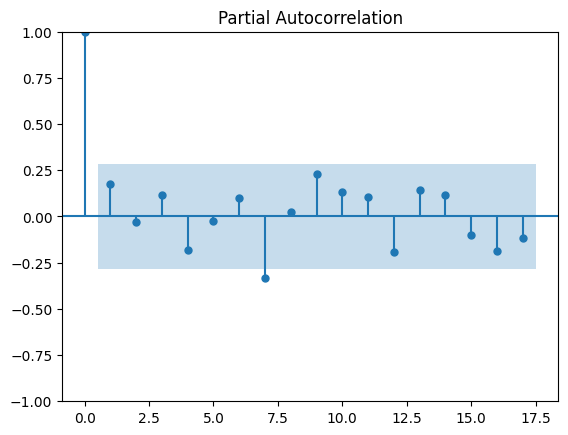

In [ ]:
plot_acf(monthly_sales)
plot_pacf(monthly_sales)
plt.show()

In [ ]:
p, d, q = 0, 1, 1
P, D, Q, s = 1, 0, 1, 12

model = SARIMAX(monthly_sales, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()
model

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


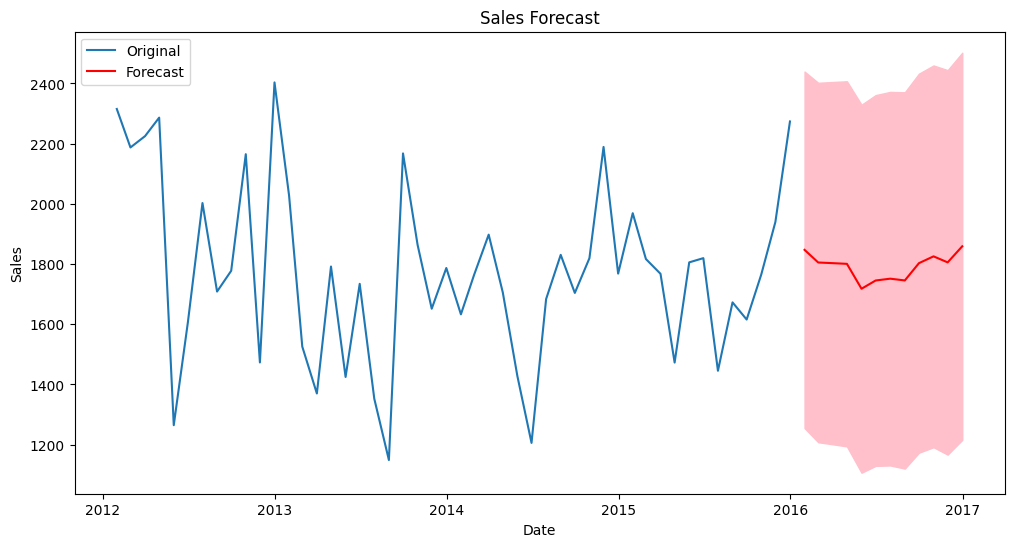

In [ ]:
forecast_periods = 12
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()


plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Original')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [ ]:
observed = monthly_sales[-forecast_periods:]
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 150.45424606056346
MSE: 36228.68831850669


prophet


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
path = '/content/drive/MyDrive/walmart Retail Data.xlsx'
data = pd.read_excel(path)

# Check the actual column names in your dataframe
print(data.columns)

# Assuming the column is named 'OrderDate' (adjust if needed)
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Rename columns for Prophet compatibility
data = data.rename(columns={'Order Date': 'ds', 'sales': 'y'}) # Renamed 'OrderDate'

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Display the train and test data shapes
print(f"Train Data Shape: {train_data.shape}")
print(f"Test Data Shape: {test_data.shape}")

Index(['City', 'Customer Age', 'Customer Name', 'Customer Segment', 'Discount',
       'Number of Records', 'Order Date', 'Order ID', 'Order Priority',
       'Order Quantity', 'Product Base Margin', 'Product Category',
       'Product Container', 'Product Name', 'Product Sub-Category', 'Profit',
       'Region', 'Row ID', 'Sales', 'Ship Date', 'Ship Mode', 'Shipping Cost',
       'State', 'Unit Price', 'Zip Code'],
      dtype='object')
Train Data Shape: (6719, 25)
Test Data Shape: (1680, 25)


In [ ]:
# Calculate IQR
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = train_data[(train_data['Sales'] > upper_bound) | (train_data['Sales'] < lower_bound)]
# Remove outliers from training data
train_data_no_outliers = train_data[(train_data['Sales'] <= upper_bound) & (train_data['Sales'] >= lower_bound)]
# Cap outliers to upper and lower bounds
train_data['Sales'] = np.clip(train_data['Sales'], lower_bound, upper_bound)

In [ ]:
from prophet import Prophet

# Assuming your original columns are 'Order Date' and 'Sales'
# Rename columns in train_data_no_outliers to 'ds' and 'y' for Prophet compatibility
train_data_no_outliers = train_data_no_outliers.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize the Prophet model
model = Prophet()

# Fit the model on historical data
model.fit(train_data_no_outliers)  # Or use the adjusted train_data

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwijtrsu/vclqldxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqwijtrsu/q2gembql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18532', 'data', 'file=/tmp/tmpqwijtrsu/vclqldxj.json', 'init=/tmp/tmpqwijtrsu/q2gembql.json', 'output', 'file=/tmp/tmpqwijtrsu/prophet_modelsa8xu_ti/prophet_model-20250120115539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:55:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:55:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


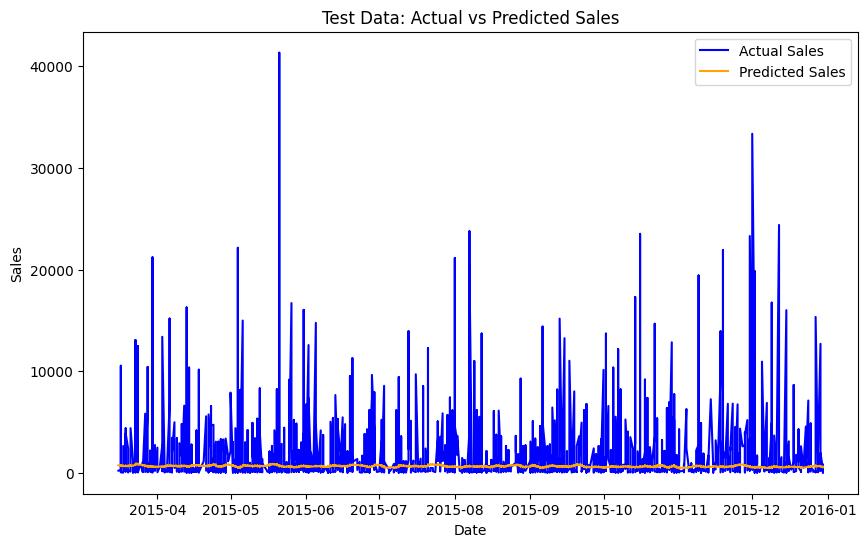

In [ ]:
# Make predictions on the test set
# Make predictions on the test set
# The first argument should be the frequency of your data (e.g., 'D' for daily, 'M' for monthly)
# future_test = model.make_future_dataframe(periods=len(test_data), freq='D')  # Replace 'D' with the correct frequency if needed
future_test = model.make_future_dataframe(periods=len(test_data), freq='D') # Assuming your data is daily

forecast_test = model.predict(future_test)

# Merge the forecasted values with the test data to compare actual vs predicted
test_data['predicted_sales'] = forecast_test['yhat'].tail(len(test_data)).values

# (Rest of your code for plotting remains the same)
forecast_test = model.predict(future_test)
# ... (Previous code remains the same) ...

# Merge the forecasted values with the test data to compare actual vs predicted
test_data['predicted_sales'] = forecast_test['yhat'].tail(len(test_data)).values

# Plot the actual vs predicted sales on the test data
plt.figure(figsize=(10, 6))

# Access the 'sales' column instead of 'y' in test_data
plt.plot(test_data['ds'], test_data['Sales'], label='Actual Sales', color='blue')

plt.plot(test_data['ds'], test_data['predicted_sales'], label='Predicted Sales', color='orange')
plt.title('Test Data: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# ... (Rest of your code remains the same) ...


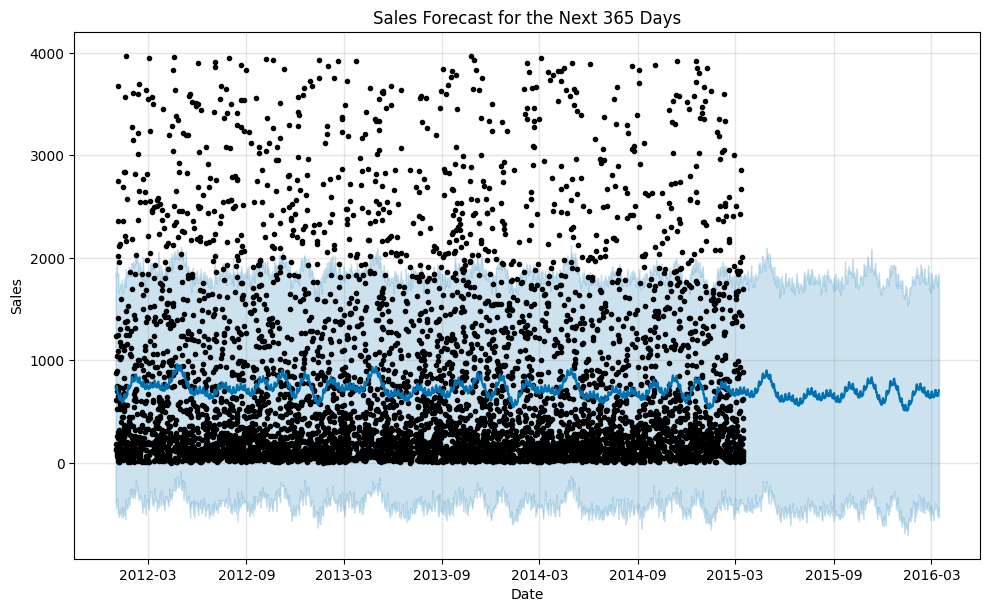

             ds        yhat
1123 2015-03-17  730.774269
1124 2015-03-18  737.288042
1125 2015-03-19  681.021161
1126 2015-03-20  699.163124
1127 2015-03-21  663.720143
...         ...         ...
1483 2016-03-11  682.425773
1484 2016-03-12  650.763261
1485 2016-03-13  655.565085
1486 2016-03-14  655.383230
1487 2016-03-15  710.319558

[365 rows x 2 columns]


In [ ]:
# Create a dataframe for future dates (next 365 days)
future_dates = model.make_future_dataframe(periods=365)

# Predict future sales
forecast_future = model.predict(future_dates)

# Plot the future forecast along with historical data
fig = model.plot(forecast_future)
plt.title("Sales Forecast for the Next 365 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

# Extract and display the forecasted future sales
future_sales = forecast_future[['ds', 'yhat']].tail(365)
print(future_sales)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


In [ ]:
# Compute RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(test_data['Sales'], test_data['predicted_sales']))

# Compute MAE (Mean Absolute Error)
mae = mean_absolute_error(test_data['Sales'], test_data['predicted_sales'])

# Print the error metrics
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 3525.272987088038
MAE: 1579.2771029832218


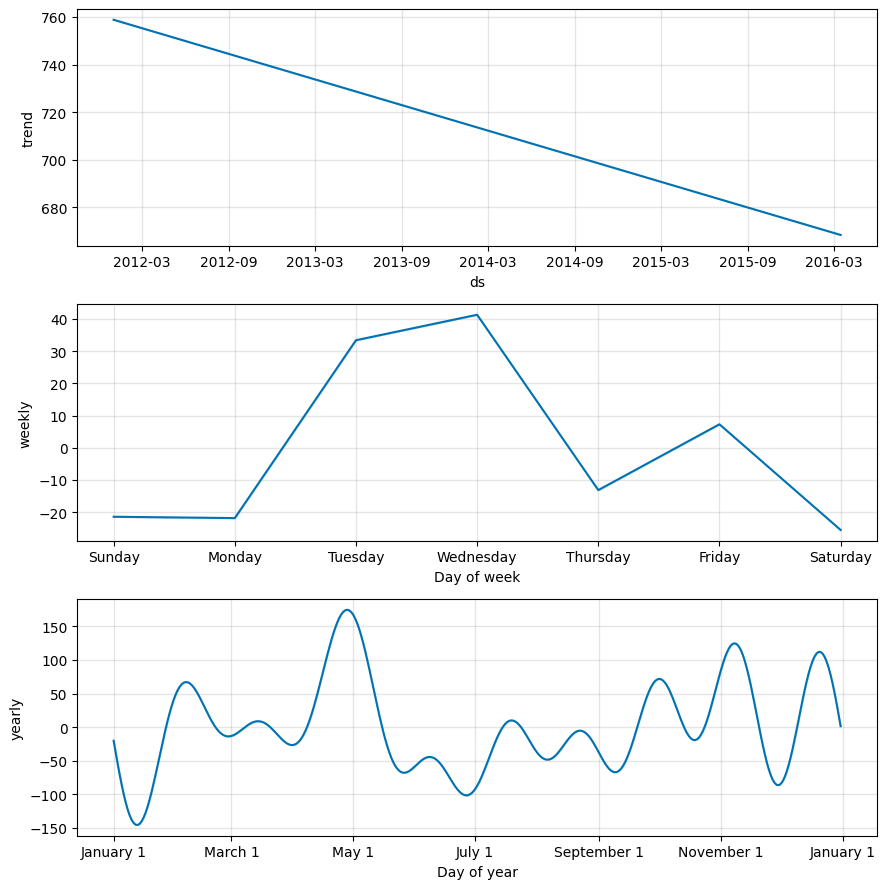

In [ ]:
fig=model.plot_components(forecast_future)

In [ ]:
from sklearn.metrics import r2_score

actual_values = test_data['Sales']
predicted_values = test_data['predicted_sales']

r_squared = r2_score(actual_values, predicted_values)

print(f"R-squared: {r_squared}")

R-squared: -0.11130934389442215


In [ ]:
from joblib import dump
dump(model,"prophet_sales_model.joblib")

['prophet_sales_model.joblib']

**delay**

In [ ]:
# Assuming you have 'Ship Date' and 'Delivery Date' columns
data['Ship Date'] = pd.to_datetime(data['Ship Date'])  # Convert to datetime if needed
# Use 'ds' instead of 'Order Date' since it was renamed in cell [8]
data['ds'] = pd.to_datetime(data['ds'])  # Convert to datetime if needed

data['delay'] = (data['ds'] > data['Ship Date']).astype(int)  # 1 for delay, 0 for no delay

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Preprocess features and target variable
X = data[['Ship Mode', 'Ship Date', 'Order Priority']]
y = data['delay']  # 1 for delayed, 0 for on-time

# Convert 'Ship Date' to numerical representation (e.g., days since a reference date)
# Choose a reference date, such as the minimum date in the column
reference_date = X['Ship Date'].min()
X['Ship Date'] = (X['Ship Date'] - reference_date).dt.days

# Convert categorical variables into numerical values using one-hot encoding for 'Ship Mode'
X = pd.get_dummies(X, columns=['Ship Mode'], drop_first=True)

# Create a LabelEncoder for 'Order Priority'
label_encoder = LabelEncoder()

# Fit and transform the 'Order Priority' column
X['Order Priority'] = label_encoder.fit_transform(X['Order Priority'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-15-b9130a360acf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ship Date'] = (X['Ship Date'] - reference_date).dt.days


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Preprocess features and target variable
X = data[['Ship Mode', 'Ship Date']]
y = data['delay']  # 1 for delayed, 0 for on-time

# Convert 'Ship Date' to numerical representation (e.g., days since a reference date)
# Choose a reference date, such as the minimum date in the column
reference_date = X['Ship Date'].min()
X['Ship Date'] = (X['Ship Date'] - reference_date).dt.days

# Convert categorical variables into numerical values using one-hot encoding
X = pd.get_dummies(X, columns=['Ship Mode'], drop_first=True) # Explicitly specify 'Ship Mode'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

<ipython-input-30-3655b73269d0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Ship Date'] = (X['Ship Date'] - reference_date).dt.days


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1680

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



In [ ]:
data['Order Priority']

,Order Priority
0,High
1,Not Specified
2,Low
3,Critical
4,Low
...,...
8394,Not Specified
8395,Low
8396,Medium
8397,Low


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


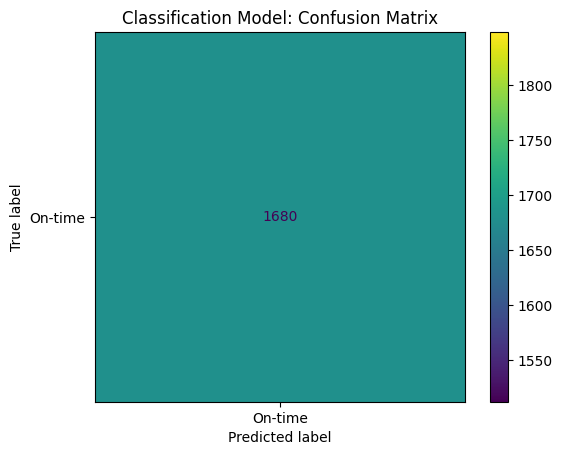

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_test' contains the actual labels and 'y_pred' contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Get unique classes from y_test (actual labels)
unique_classes = np.unique(y_test)

# Adjust display_labels based on unique classes
display_labels = ['On-time', 'Delayed']  # Default labels
if len(unique_classes) == 1:
    if unique_classes[0] == 0:
        display_labels = ['On-time']
    else:
        display_labels = ['Delayed']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot()
plt.title("Classification Model: Confusion Matrix")
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = data.rename(columns={'Order Date': 'ds', 'sales': 'y'})

In [ ]:
# Assuming 'data' is your DataFrame and 'ds' (renamed from 'Order Date') and 'Sales' are the relevant columns
data['Order Date'] = pd.to_datetime(data['ds'])  # Convert the 'ds' column (previously 'Order Date') to datetime
data = data.set_index('Order Date')  # Set the 'ds' column as the index
# Select only the 'Sales' column for resampling and summing
data = data['Sales'].resample('M').sum()  # Resample to monthly sum of sales

KeyError: 'ds'

In [ ]:
train_data = data[:-30]  # Use data up to the last 30 periods for training
test_data = data[-30:]  # Use the last 30 periods for testing

In [ ]:
model = ARIMA(train_data['Sales'], order=(5, 1, 0))
model_fit = model.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
predictions = model_fit.predict(start=len(train_data), end=len(data)-1)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
# ... (your existing code) ...

# Calculate the mean squared error using the function
mse = mean_squared_error(test_data['Sales'], predictions)

# Then calculate the root mean squared error by taking the square root of the mse
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")

RMSE: 3548.442116204376


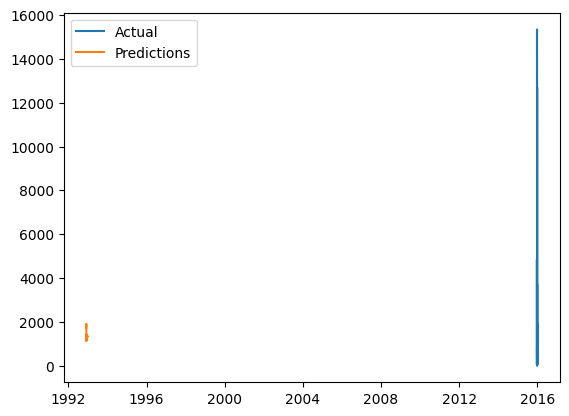

In [ ]:
plt.plot(test_data['Sales'], label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.show()